In [11]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Get column names for feature importance analysis
input_data = pd.read_csv("../Data/exoplanet_data.csv").iloc[:,1:]
feature_names = input_data.columns

In [13]:
# Load data
npz = np.load("../Data/Kepler_data_train.npz",allow_pickle=True)

x_train = npz['inputs']
y_train = npz['targets']

npz = np.load("../Data/Kepler_data_test.npz",allow_pickle=True)
x_test = npz['inputs']
y_test = npz['targets']

In [14]:
feature_names = pd.DataFrame(x_train)

# Decision Tree Classifier

In [15]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)
tree_classifier.score(x_test, y_test)

0.852974828375286

In [16]:
## Feature importance of descision tree classifier
sorted(zip(tree_classifier.feature_importances_, feature_names), reverse=True)

[(0.1885148380619759, 0),
 (0.1883255554369894, 2),
 (0.1715423069019366, 1),
 (0.13706063235373991, 26),
 (0.030401386032637454, 3),
 (0.026646487417368102, 10),
 (0.01522750696147155, 13),
 (0.014551769789075535, 4),
 (0.012032355780352954, 7),
 (0.011511507941897665, 30),
 (0.011375567804454225, 32),
 (0.011049979672242609, 14),
 (0.010778597900884987, 37),
 (0.010759719166234463, 38),
 (0.01057443431713684, 19),
 (0.010288670256288896, 21),
 (0.010153778392284032, 39),
 (0.009048116301055082, 9),
 (0.008102063342118463, 29),
 (0.007923006143885766, 28),
 (0.00748030358902065, 27),
 (0.007309366305136553, 12),
 (0.0069377859747109406, 17),
 (0.006606999881606849, 25),
 (0.0065397014850117445, 15),
 (0.006427737519077141, 20),
 (0.00606853062401302, 8),
 (0.005869387174820218, 31),
 (0.005830681296778635, 34),
 (0.005681125117452176, 16),
 (0.005573336007946305, 5),
 (0.005196897154751596, 6),
 (0.004825876833651588, 24),
 (0.0047028638149342805, 35),
 (0.00417133670386044, 36),
 (0.

In [17]:
y_pred = tree_classifier.predict(x_test)

In [18]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.74      0.71      0.72       438
FALSE POSITIVE       0.72      0.75      0.73       447
     CANDIDATE       0.99      0.98      0.98       863

      accuracy                           0.85      1748
     macro avg       0.81      0.81      0.81      1748
  weighted avg       0.85      0.85      0.85      1748



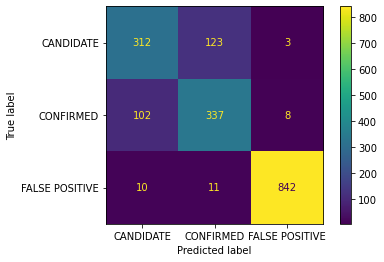

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_classifier, x_test, y_test)

# Random Forest Classifier

In [20]:
forest_classifer = RandomForestClassifier(n_estimators=200)
forest_classifer = forest_classifer.fit(x_train, y_train)
forest_classifer.score(x_test, y_test)

0.8901601830663616

In [49]:
## Feature importance of random forest classifier
sorted(zip(forest_classifer.feature_importances_, feature_names), reverse=True)

[(0.11423974589322476, 2),
 (0.10001173014528054, 0),
 (0.07292687517180903, 1),
 (0.060266305595341435, 26),
 (0.053401514471152316, 19),
 (0.036565959571334065, 14),
 (0.031814718059854655, 21),
 (0.03176814704847605, 3),
 (0.030882845674259463, 20),
 (0.028951160285211976, 30),
 (0.02883730656246583, 15),
 (0.026314567271800232, 29),
 (0.02239388913573683, 9),
 (0.021905676032875913, 8),
 (0.021675387839642478, 16),
 (0.021227794564274417, 4),
 (0.021170794472226598, 13),
 (0.019834150928331205, 10),
 (0.018362811630946746, 24),
 (0.0178325626513295, 6),
 (0.01563948026005604, 5),
 (0.015338489770022074, 25),
 (0.014237396909685073, 18),
 (0.013572188620062842, 22),
 (0.013387105247598492, 23),
 (0.013020893819544108, 37),
 (0.012230847177620064, 7),
 (0.012005635521346028, 17),
 (0.011163702164419802, 35),
 (0.010942335496836786, 38),
 (0.010544101122022722, 12),
 (0.010457570609444987, 11),
 (0.010258196502455439, 39),
 (0.009895110044366502, 33),
 (0.009604750082670078, 28),
 (0.

In [50]:
y_pred = forest_classifer.predict(x_test)

In [51]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.81      0.78      0.80       399
FALSE POSITIVE       0.82      0.81      0.82       448
     CANDIDATE       0.98      1.00      0.99       901

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



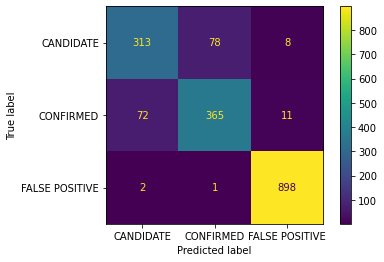

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest_classifer, x_test, y_test)